Hello, using the following dataset, I will be predicting insurance costs using linear regression. The features included in the dataset to predict medical costs are: Age, Sex, BMI, Number of Children, Smoker status, and the benefeciary's region in the US. 

Let's begin.

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [3]:
# Read in the CSV file onto a Pandas dataframe
df = pd.read_csv("/Users/andrewchavarria/Downloads/insurance.csv")

In [4]:
# Check for any null entries within the dataset
for (columnName, columnData) in df.iteritems():
    print('Column Name : ', columnName)
    print('Null entry count : ', len(df[pd.isnull(df[columnName])]))

Column Name :  age
Null entry count :  0
Column Name :  sex
Null entry count :  0
Column Name :  bmi
Null entry count :  0
Column Name :  children
Null entry count :  0
Column Name :  smoker
Null entry count :  0
Column Name :  region
Null entry count :  0
Column Name :  charges
Null entry count :  0


Great! There are no null entries within our dataset. Now that we are finished with data munging, we can begin to create a model with our data.

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Split our data into the training set and the target
y = df['charges']
df=df.drop(['charges'],axis=1)

The features "sex" and "smoker" are dichotomous variables, so we can convert them into dummy variables using Pandas to encode them for our linear regression model. Turning male/female and yes/no into 0's and 1's will make linear regression possible.

In [7]:
df = pd.get_dummies(df, columns=['sex'])
df = pd.get_dummies(df, columns=['smoker'])

In [8]:
X=df.drop(['region'],axis=1)
calculate_vif(X)

/var/folders/1k/rg606rnd3sv03j_0bw6t7nym0000gn/T/ipykernel_38355/3781868860.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
/var/folders/1k/rg606rnd3sv03j_0bw6t7nym0000gn/T/ipykernel_38355/3781868860.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
/var/folders/1k/rg606rnd3sv03j_0bw6t7nym0000gn/T/ipykernel_38355/3781868860.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
/var/folders/1k/rg606rnd3sv03j_0bw6t7nym0000gn/T/ipykernel_38355/3781868860.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)


,Var,Vif
3,sex_female,inf
4,sex_male,inf
5,smoker_no,inf
6,smoker_yes,inf
0,age,1.02
1,bmi,1.01
2,children,1.00


Let's drop one column from each feature we transformed so as to not introduce multicollinearity into our model. Currently, VIF is INF for sex and smoker status.

In [9]:
X=df.drop(['region','sex_female', 'smoker_no'],axis=1)
calculate_vif(X)

,Var,Vif
1,bmi,8.75
0,age,7.55
2,children,1.80
3,sex_male,0.49
4,smoker_yes,0.08


That eliminates the problem for sex and smoker status. NOT SURE ABOUT BMI AND AGE YET.

In [10]:
df = df.drop(['sex_female', 'smoker_no'],axis=1)

In [11]:
print(len(df['region'].unique()))

4


Ok, region is also a categorical data type, and it has four unique values. Since region isn't ordinal, we won't want to use label encoding (just like with sex and smoker status). Let's keep using one-hot encoding with Pandas using the get_dummies() function.

In [12]:
df = pd.get_dummies(df, columns=['region'])

Multicollinearity is also a problem that arises with one-hot encoding. Our encoding for 4 different categories could have that issue, so we can calculate Variance Inflation Factor to measure multicollinearity.

## REPHRASE b/c we are repeating ourselves

In [13]:
calculate_vif(df)

,Var,Vif
7,region_southeast,3.42
8,region_southwest,1.96
6,region_northwest,1.83
5,region_northeast,1.81
1,bmi,1.11
0,age,1.02
3,sex_male,1.01
4,smoker_yes,1.01
2,children,1.00


These values are far more acceptable. Let's keep moving. We can proceed by visualizing the data we have so far.

In [14]:
# Convert pandas data objects to numpy array for visualization and model fitting
X = df.to_numpy()
y = y.to_numpy()

In [15]:
fig,ax=plt.subplots(9, figsize=(10, 30), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel("Medical Insurance Cost")
    
plt.close() # HIDES PLOT FOR NOW

Let's split the data into training and test data.

In [16]:
from sklearn.model_selection import train_test_split

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Now that we have our data split, we can proceed to fit our model.

In [17]:
from sklearn.linear_model import LinearRegression

# Create a regression model
model = LinearRegression()
  
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

With our model fit, let us make some predictions:

In [18]:
# making predictions
predictions = model.predict(X_test)

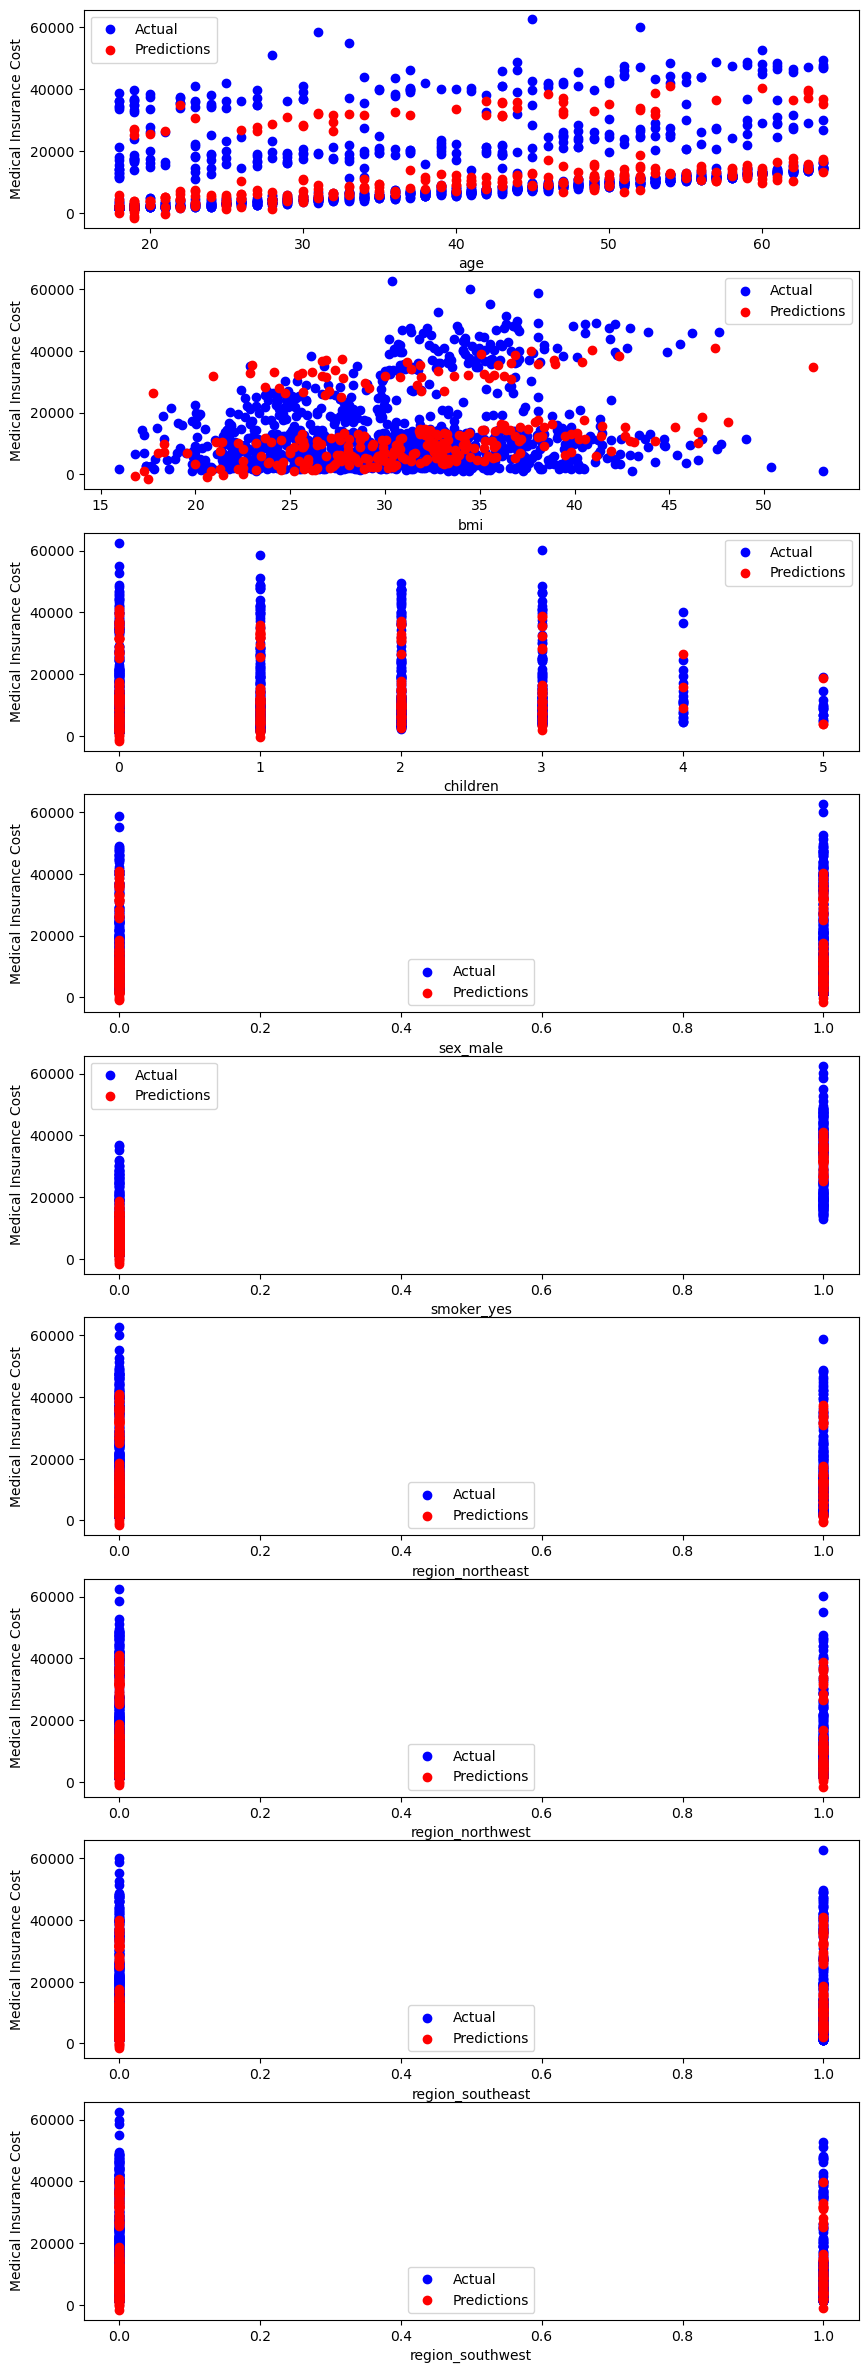

In [19]:
# Display predictions vs. test input
fig,ax=plt.subplots(9, figsize=(10, 30), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, c='b', label = 'Actual')        
    ax[i].scatter(X_test[:,i],predictions, c='r', label='Predictions')
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel("Medical Insurance Cost")
    ax[i].legend()

The model above was fitted using unnormalized data. We will now normalize the data using Z_score normalization to see if that gives us a better model prediction.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calulcate std dev and mean, and then fit to our test data.
X_norm = scaler.fit_transform(X)

In [21]:
# creating train and test sets with normalized data
X_train_norm, X_test_norm, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42)

In [22]:
# Fit the model
model.fit(X_train_norm, y_train)
# making predictions with normalization
predictions_norm = model.predict(X_test_norm)

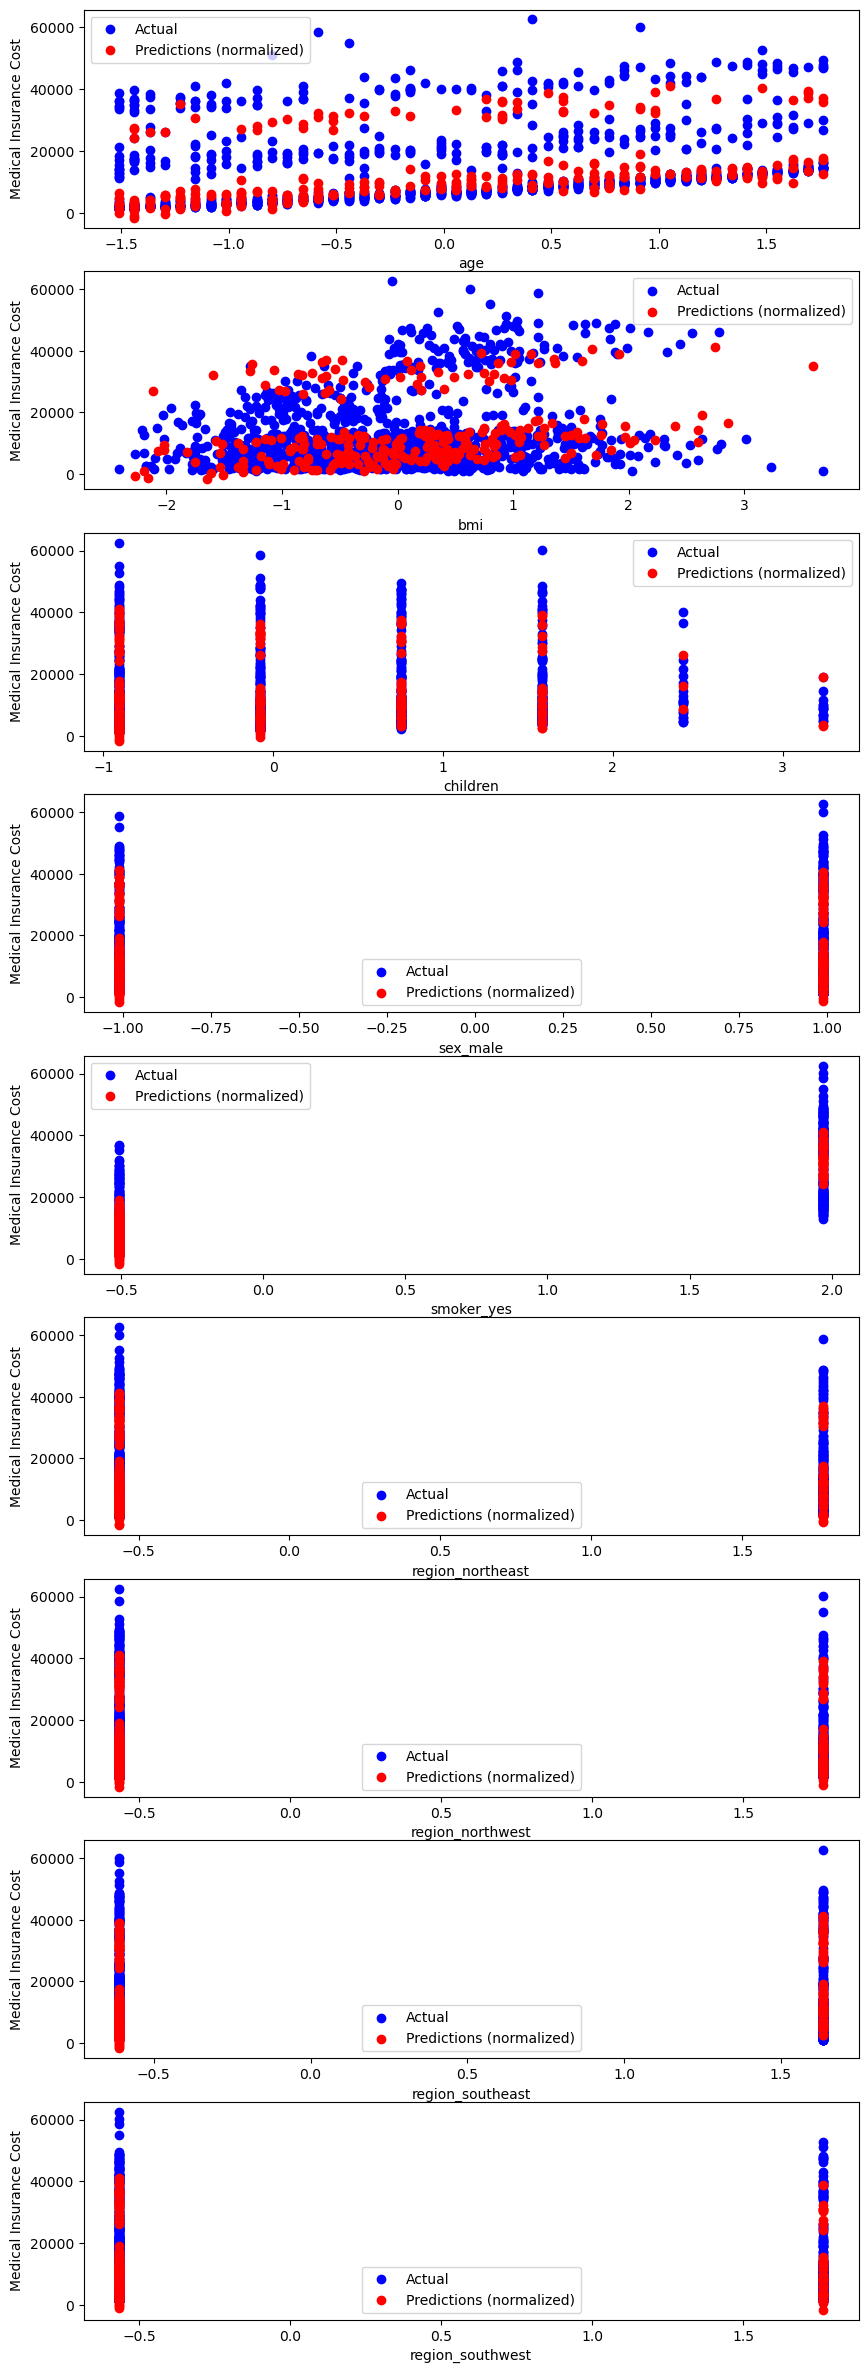

In [23]:
# Display predictions vs. test input
fig,ax=plt.subplots(9, figsize=(10, 30), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_norm[:,i], y_train, c='b', label = 'Actual')        
    ax[i].scatter(X_test_norm[:,i],predictions_norm, c='r', label='Predictions (normalized)')
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel("Medical Insurance Cost")
    ax[i].legend()

Now that we've gotten an intuition from visualization, let's compute the performance scores to see exactly how our prediction models are doing. Regression models are often evaluated using Mean Squared Error and Mean Absolute Error.

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# model evaluation
print('Mean_squared_error Unnormalized : ', mean_squared_error(y_test, predictions))
print('Mean_absolute_error Unnormalized: ', mean_absolute_error(y_test, predictions))
print("\n")
print('Mean_squared_error Normalized : ', mean_squared_error(y_test, predictions_norm))
print('Mean_absolute_error Normalized: ', mean_absolute_error(y_test, predictions_norm))
print("\n")
r2_test=r2_score(y_test,predictions_norm)
print("R2 value Normalized: ",r2_test)
r2_test=r2_score(y_test,predictions)
print("R2 value Unnormalized: ",r2_test)

Mean_squared_error Unnormalized :  33596915.851361476
Mean_absolute_error Unnormalized:  4181.194473753645


Mean_squared_error Normalized :  34033212.14643455
Mean_absolute_error Normalized:  4224.888907645732


R2 value Normalized:  0.7807826716559165
R2 value Unnormalized:  0.7835929767120722


Normalization seems to only hurt the model's performance in our case. We are receiving an R2 score of .78, which likely isn't reliable enough for a real-world application of insurance cost prediction. 

Could 10-fold cross-validation improve our test performance?

In [25]:
from sklearn.model_selection import cross_validate

In [26]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

scores = cross_validate(model, X, y, scoring=scoring,
cv=10)

In [27]:
print("%0.2f mean_squared error for test data" % (-1* np.mean(scores['test_neg_mean_squared_error'])))
print("%0.2f mean_squared error for test data" % (-1* np.mean(scores['test_neg_mean_absolute_error'])))
print("%0.2f mean_squared error for test data" % (np.mean(scores['test_r2'])))

36990225.37 mean_squared error for test data
4196.61 mean_squared error for test data
0.74 mean_squared error for test data


In our case, 10-fold cross validation did not reduce error or improve the R2 score.